In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random
from mpl_toolkits.mplot3d import Axes3D

Necessary header files

In [5]:
def original_policy_evaluation(v_s,theeta,pi_s,gamma):
#     if pi_s[i,j]<0:
#         we are sending -1*pi_s[i,j] cars from location 2 to location1
# actioni is the number of cars sent from location1 to location2
# actionj is the number of cars sent from location2 to location1
    while(True):
        delta=0;
        for i in range(21):
            for j in range(21):
                v=v_s[i,j]
                new_v_s=v_s[i,j]
                actioni=0
                actionj=0
                if(pi_s[i,j]<0):
                    actioni=0
                    actionj=(int)(pi_s[i,j]*(-1))
                else:
                    actionj=0
                    actioni=(int)(pi_s[i,j])
                if(i-actioni+actionj>=0 and i-actioni+actionj<=20 and j-actionj+actioni>=0 and j-actionj+actioni<=20 ):
                    cars_location1=(int)(i-actioni+actionj)
                    cars_location2=(int)(j-actionj+actioni)
                    rent_cars_location1=min(cars_location1,3)
                    rent_cars_location2=min(cars_location2,4)
                    return_cars_location1=min(20,cars_location1-rent_cars_location1+3)
                    return_cars_location2=min(20,cars_location2-rent_cars_location2+2)                           
                    new_v_s=(10*(rent_cars_location1+rent_cars_location2)+(actioni+actionj)*(-2)+gamma*v_s[return_cars_location1,return_cars_location2])
                v_s[i,j]=new_v_s
                delta=max(delta,abs(v-new_v_s))
        if(delta<theeta):
            break


    
        

In [6]:
def new_policy_evaluation(v_s,theeta,pi_s,gamma):
#     if pi_s[i,j]<0:
#         we are sending -1*pi_s[i,j] cars from location 2 to location1
# actioni is the number of cars sent from location1 to location2
# actionj is the number of cars sent from location2 to location1
    while(True):
        delta=0;
        for i in range(21):
            for j in range(21):
                v=v_s[i,j]
                new_v_s=v_s[i,j]
                actioni=0
                actionj=0
                if(pi_s[i,j]<0):
                    actioni=0
                    actionj=(int)(pi_s[i,j]*(-1))
                else:
                    actionj=0
                    actioni=(int)(pi_s[i,j])
                if(i-actioni+actionj>=0 and i-actioni+actionj<=20 and j-actionj+actioni>=0 and j-actionj+actioni<=20 ):
                    total_action=actioni+actionj
                    if(actioni>0):
                        total_action-=1
                    if(actionj>0):
                        total_action-=1
                    cars_location1=(int)(i-actioni+actionj)
                    cars_location2=(int)(j-actionj+actioni)
                    rent_cars_location1=min(cars_location1,3)
                    rent_cars_location2=min(cars_location2,4)
                    return_cars_location1=min(20,cars_location1-rent_cars_location1+3)
                    return_cars_location2=min(20,cars_location2-rent_cars_location2+2)     
                    temp_reward=0
                    if(return_cars_location1>10):
                        temp_reward-=4;
                    if(return_cars_location2>10):
                        temp_reward-=4;
                    new_v_s=(10*(temp_reward+rent_cars_location1+rent_cars_location2)+(actioni+actionj)*(-2)+gamma*v_s[return_cars_location1,return_cars_location2])
                v_s[i,j]=new_v_s
                delta=max(delta,abs(v-new_v_s))
        if(delta<theeta):
            break


In [7]:
def original_policy_improvement(v_s,pi_s,gamma):
    policy_stable=True
    for i in range(21):
        for j in range(21):
            old_policy=pi_s[i,j]
            new_policy=pi_s[i,j]
            max1=-9999999
            for actioni in range(6):
                actionj=0
                if(i-actioni+actionj>=0 and i-actioni+actionj<=20 and j-actionj+actioni>=0 and j-actionj+actioni<=20 ):
                    cars_location1=i-actioni+actionj
                    cars_location2=j-actionj+actioni
                    rent_cars_location1=min(cars_location1,3)
                    rent_cars_location2=min(cars_location2,4)
                    return_cars_location1=max(20,cars_location1-rent_cars_location1+3)
                    return_cars_location2=max(20,cars_location2-rent_cars_location2+2)                           
                    temp=(10*(rent_cars_location1+rent_cars_location2)+(actioni+actionj)*(-2)+gamma*v_s[return_cars_location1,return_cars_location2])
                    if(temp>max1):
                        new_policy=actioni
            for actionj in range(6):
                actioni=0
                if(i-actioni+actionj>=0 and i-actioni+actionj<=20 and j-actionj+actioni>=0 and j-actionj+actioni<=20 ):
                    cars_location1=i-actioni+actionj
                    cars_location2=j-actionj+actioni
                    rent_cars_location1=min(cars_location1,3)
                    rent_cars_location2=min(cars_location2,4)
                    return_cars_location1=max(20,cars_location1-rent_cars_location1+3)
                    return_cars_location2=max(20,cars_location2-rent_cars_location2+2)                           
                    temp=(10*(rent_cars_location1+rent_cars_location2)+(actioni+actionj)*(-2)+gamma*v_s[return_cars_location1,return_cars_location2])
                    if(temp>max1):
                        new_policy=actionj*(-1)
            pi_s[i,j]=new_policy
            if(old_policy!=new_policy):
                policy_stable=False
    return policy_stable

In [8]:
def new_policy_improvement(v_s,pi_s,gamma):
    policy_stable=True
    for i in range(21):
        for j in range(21):
            old_policy=pi_s[i,j]
            new_policy=pi_s[i,j]
            max1=-9999999
            for actioni in range(6):
                actionj=0
                if(i-actioni+actionj>=0 and i-actioni+actionj<=20 and j-actionj+actioni>=0 and j-actionj+actioni<=20 ):
                    total_action=actioni+actionj
                    if(actioni>0):
                        total_action-=1
                    if(actionj>0):
                        total_action-=1
                    cars_location1=i-actioni+actionj
                    cars_location2=j-actionj+actioni
                    rent_cars_location1=min(cars_location1,3)
                    rent_cars_location2=min(cars_location2,4)
                    return_cars_location1=max(20,cars_location1-rent_cars_location1+3)
                    return_cars_location2=max(20,cars_location2-rent_cars_location2+2)  
                    temp_reward=0
                    if(return_cars_location1>10):
                        temp_reward-=4;
                    if(return_cars_location2>10):
                        temp_reward-=4;
                    temp=(temp_reward+10*(rent_cars_location1+rent_cars_location2)+(actioni+actionj)*(-2)+gamma*v_s[return_cars_location1,return_cars_location2])
                    if(temp>max1):
                        new_policy=actioni
            for actionj in range(6):
                actioni=0
                if(i-actioni+actionj>=0 and i-actioni+actionj<=20 and j-actionj+actioni>=0 and j-actionj+actioni<=20 ):
                    total_action=actioni+actionj
                    if(actioni>0):
                        total_action-=1
                    if(actionj>0):
                        total_action-=1
                    cars_location1=i-actioni+actionj
                    cars_location2=j-actionj+actioni
                    rent_cars_location1=min(cars_location1,3)
                    rent_cars_location2=min(cars_location2,4)
                    return_cars_location1=max(20,cars_location1-rent_cars_location1+3)
                    return_cars_location2=max(20,cars_location2-rent_cars_location2+2)   
                    temp_reward=0
                    if(return_cars_location1>10):
                        temp_reward-=4;
                    if(return_cars_location2>10):
                        temp_reward-=4;
                    temp=(temp_reward+10*(rent_cars_location1+rent_cars_location2)+(actioni+actionj)*(-2)+gamma*v_s[return_cars_location1,return_cars_location2])
                    if(temp>max1):
                        new_policy=actionj*(-1)
            pi_s[i,j]=new_policy
            if(old_policy!=new_policy):
                policy_stable=False
    return policy_stable

In [30]:
def plot_graph_v(v_s):
    x=[]
    y=[]
    for i in range(21):
        x.append(i)
        y.append(i)
    X, Y = np.meshgrid(x, y)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y, v_s,)
    ax.set_xlabel('location1')
    ax.set_ylabel('location2')
    ax.set_zlabel('v_s');

In [31]:
def plot_graph_pi(v_s):
    x=[]
    y=[]
    for i in range(21):
        x.append(i)
        y.append(i)
    X, Y = np.meshgrid(x, y)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y, v_s,)
    ax.set_xlabel('location1')
    ax.set_ylabel('location2')
    ax.set_zlabel('pi_s');

In [40]:
def original_policy_iteration():
    print("----original_policy_iteartion----")
    v_s=np.zeros([21,21])
    pi_s=np.zeros([21,21])
    theeta=0.00001
    gamma=0.9
    original_policy_evaluation(v_s,theeta,pi_s,gamma)
    counter=1;
    while(original_policy_improvement(v_s,pi_s,gamma)==False):
        original_policy_evaluation(v_s,theeta,pi_s,gamma)
    print("Value function:")
    plot_graph_v(v_s)
    print("Policy Selected:")
    plot_graph_pi(pi_s)

In [41]:
def new_policy_iteration():
    print("----new_policy_iteartion----")
    v_s=np.zeros([21,21])
    pi_s=np.zeros([21,21])
    theeta=0.00001
    gamma=0.9
    new_policy_evaluation(v_s,theeta,pi_s,gamma)
    counter=1;
    while(new_policy_improvement(v_s,pi_s,gamma)==False):
        new_policy_evaluation(v_s,theeta,pi_s,gamma)
    print("Value function:")
    plot_graph_v(v_s)
    print("Policy Selected:")
    plot_graph_pi(pi_s)

----original_policy_iteartion----
Value function:
Policy Selected:
----new_policy_iteartion----
Value function:
Policy Selected:


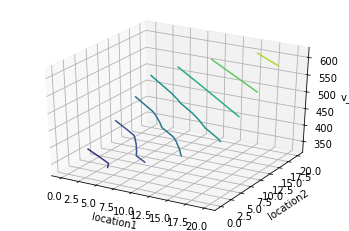

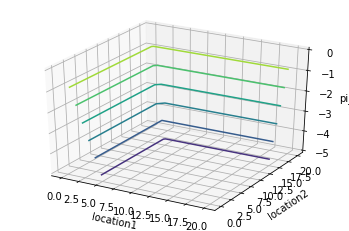

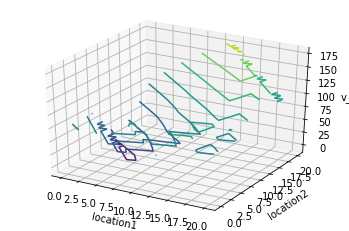

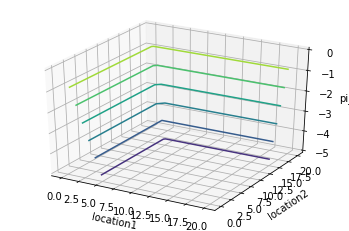

In [42]:
original_policy_iteration()
new_policy_iteration()

In the matrix representing optimal policy corresponding to each state,
-i means you are sending i car from location2 to position1 and i means you are sending i car from location1 to location2